In [3]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
%pip install xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.8/124.9 MB 1.4 MB/s eta 0:01:29
   ---------------------------------------- 1.0/124.9 MB 1.3 MB/s eta 0:01:37
    --------------------------------------- 1.6/124.9 MB 1.6 MB/s eta 0:01:15
    --------------------------------------- 1.8/124.9 MB 1.7 MB/s eta 0:01:13
    --------------------------------------- 2.4/124.9 MB 1.8 MB/s eta 0:01:07
    --------------------------------------- 2.9/124.9 MB 1.9 MB/s eta 0:01:04
   - -------------------------------------- 3.4/124.9 MB 2.0 MB/s eta 0:01:02
   - -------------------------------------- 3.9/124.9 MB 2.1 MB/s eta 0:00:59
   - -------------------------------------- 4.5/124.9 MB 2.1 MB/s eta 0:00:58
   - -------------------------------------- 5.0/124.9 MB 2.1 MB/s eta 0:00:56
   - --


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dipraj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
import pandas as pd

file_path = r"D:\NLP\DATA\amazon_alexa(1).csv"

try:
    # Using latin1 encoding
    data = pd.read_csv(file_path,encoding='latin1')
    print(f"Dataset shape: {data.shape}")
except Exception as e:
    print(f"Error: {e}")



Dataset shape: (3150, 5)


In [15]:
data.head()


,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [17]:
#Column names

print(f"Feature names : {data.columns.values}")

Feature names : ['rating' 'date' 'variation' 'verified_reviews' 'feedback']


In [18]:
#Check for null values

data.isnull().sum()

rating               0
date                 0
variation            0
verified_reviews    80
feedback             0
dtype: int64

In [19]:
#Getting the record where 'verified_reviews' is null 

data[data['verified_reviews'].isna() == True]


,rating,date,variation,verified_reviews,feedback
85,5,30-Jul-18,Heather Gray Fabric,NaN,1
183,3,29-Jul-18,Heather Gray Fabric,NaN,1
219,5,29-Jul-18,Sandstone Fabric,NaN,1
374,1,26-Jul-18,Black,NaN,0
406,1,16-Jul-18,White,NaN,0
...,...,...,...,...,...
3114,3,30-Jul-18,Black Dot,NaN,1
3120,5,30-Jul-18,Black Dot,NaN,1
3123,4,30-Jul-18,Black Dot,NaN,1
3126,5,30-Jul-18,Black Dot,NaN,1


In [20]:
#We will drop the null record

data.dropna(inplace=True)

In [21]:
print(f"Dataset shape after dropping null values : {data.shape}")

Dataset shape after dropping null values : (3070, 5)


In [23]:
#Creating a new column 'length' that will contain the length of the string in 'verified_reviews' column

data['length'] = data['verified_reviews'].apply(len)

In [24]:
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [26]:
#Randomly checking for 30th record

print(f"'verified_reviews' column value: {data.iloc[30]['verified_reviews']}") #Original value
print(f"Length of review : {len(data.iloc[30]['verified_reviews'])}") #Length of review using len()
print(f"'length' column value : {data.iloc[30]['length']}") #Value of the column 'length'

'verified_reviews' column value: Still learning all the capabilities...but so far pretty pretty pretty good
Length of review : 74
'length' column value : 74


In [109]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [110]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

# Reading the dataset again in case it's not in memory
file_path = r"D:\NLP\DATA\amazon_alexa(1).csv"

try:
    # Using latin1 encoding
    data = pd.read_csv(file_path, encoding='latin1')
    print(f"Dataset shape: {data.shape}")
except Exception as e:
    print(f"Error: {e}")

# Handling missing values and creating a 'length' column for review length
data.dropna(subset=['verified_reviews'], inplace=True)  # Drop rows where 'verified_reviews' is NaN
data['length'] = data['verified_reviews'].apply(len)

# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis
data['sentiment_score'] = data['verified_reviews'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Categorize sentiment based on score
data['sentiment'] = data['sentiment_score'].apply(
    lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral')
)

# Check sentiment distribution
print(data['sentiment'].value_counts())


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Dipraj\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Dataset shape: (3150, 5)
sentiment
positive    2585
neutral      259
negative     226
Name: count, dtype: int64


2. Correlation Analysis between Review Sentiments and Ratings
We can calculate the correlation between sentiment and ratings as you requested

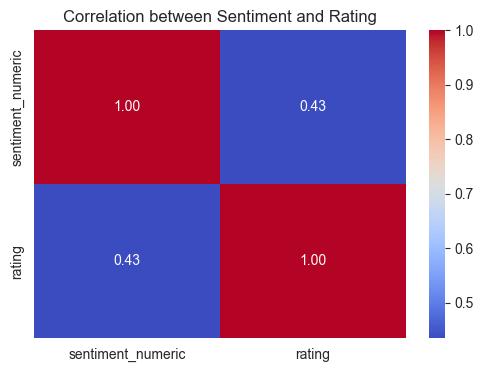

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert sentiment to numeric values for correlation analysis
sentiment_map = {'positive': 1, 'neutral': 0, 'negative': -1}
data['sentiment_numeric'] = data['sentiment'].map(sentiment_map)

# Calculate correlation between sentiment and rating
correlation = data[['sentiment_numeric', 'rating']].corr()

# Visualize the correlation
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Sentiment and Rating')
plt.show()


3. Trend Analysis of Sentiment Over Time
You can analyze sentiment trends over time by grouping the data by date and calculating the average sentiment score per period.

In [111]:
data.dtypes

rating                int64
date                 object
variation            object
verified_reviews     object
feedback              int64
length                int64
sentiment_score     float64
sentiment            object
dtype: object

In [112]:
len(data)

3070

In [29]:
#Distinct values of 'rating' and its count  

print(f"Rating value count: \n{data['rating'].value_counts()}")

Rating value count: 
rating
5    2246
4     447
1     146
3     140
2      91
Name: count, dtype: int64


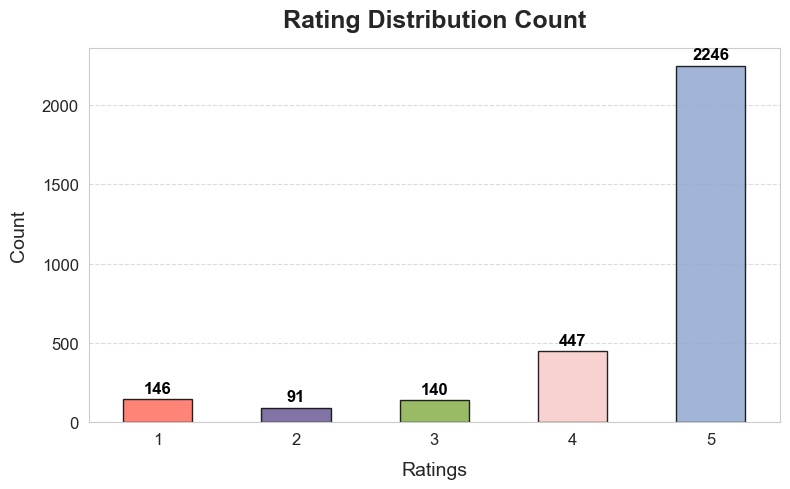

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a modern, visually appealing style
sns.set_style('whitegrid')
plt.figure(figsize=(8, 5))

# Define vibrant custom colors for each rating
vibrant_colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1']

# Create the bar plot with sorted values
ax = data['rating'].value_counts().sort_index().plot.bar(color=vibrant_colors, edgecolor='black', alpha=0.85)

# Add title and axis labels with enhanced font settings
plt.title('Rating Distribution Count', fontsize=18, weight='bold', pad=15)
plt.xlabel('Ratings', fontsize=14, labelpad=10)
plt.ylabel('Count', fontsize=14, labelpad=10)

# Add annotations with bold text on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, weight='bold', color='black', 
                xytext=(0, 8), textcoords='offset points')

# Customize tick parameters for better readability
ax.tick_params(axis='x', labelsize=12, rotation=0)
ax.tick_params(axis='y', labelsize=12)

# Add gridlines only to the y-axis for subtlety
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.xaxis.grid(False)

# Show the plot
plt.tight_layout()
plt.show()



In [35]:
#Finding the percentage distribution of each rating - we'll divide the number of records for each rating by total number of records

print(f"Rating value count - percentage distribution: \n{round(data['rating'].value_counts()/data.shape[0]*100,2)}")

Rating value count - percentage distribution: 
rating
5    73.16
4    14.56
1     4.76
3     4.56
2     2.96
Name: count, dtype: float64


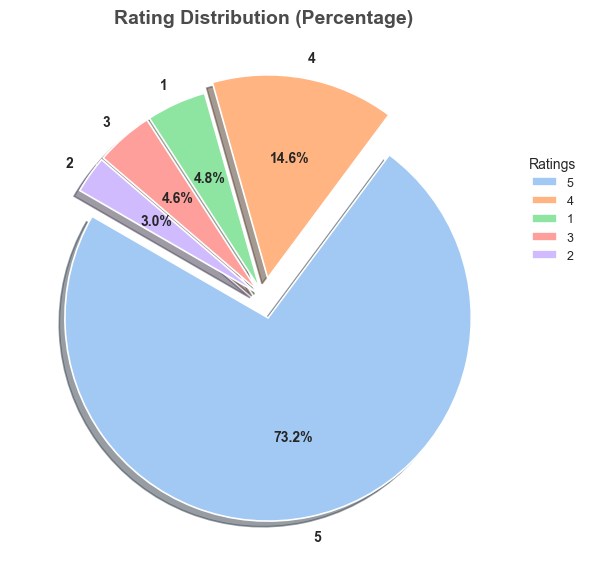

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define modern color palette
colors = sns.color_palette("pastel", len(data['rating'].unique()))

# Create a compact figure
fig = plt.figure(figsize=(6, 6))

# Pie chart parameters
wp = {'linewidth': 1.2, "edgecolor": 'white'}  # Sleek edges
tags = data['rating'].value_counts() / data.shape[0]
explode = [0.1 if pct > 0.1 else 0.05 for pct in tags]  # Highlight slices based on size

# Plot the pie chart
tags.plot(
    kind='pie',
    autopct=lambda pct: f"{pct:.1f}%" if pct > 0 else '',
    shadow=True,
    colors=colors,
    startangle=150,
    wedgeprops=wp,
    explode=explode,
    label='',  # Remove default label
    textprops={'fontsize': 10, 'weight': 'bold'},  # Futuristic text style
)

# Add title with futuristic font and alignment
plt.title('Rating Distribution (Percentage)', fontsize=14, weight='bold', color='#4B4B4B', pad=15)

# Add a minimal legend for context
plt.legend(tags.index, title="Ratings", loc="upper left", bbox_to_anchor=(1, 0.8), fontsize=9, title_fontsize=10, frameon=False)

# Display the chart
plt.tight_layout()
plt.show()



In [38]:
#Distinct values of 'feedback' and its count 

print(f"Feedback value count: \n{data['feedback'].value_counts()}")

Feedback value count: 
feedback
1    2833
0     237
Name: count, dtype: int64


In [39]:
#Extracting the 'verified_reviews' value for one record with feedback = 0

review_0 = data[data['feedback'] == 0].iloc[1]['verified_reviews']
print(review_0)

Sound is terrible if u want good music too get a bose


In [40]:
#Extracting the 'verified_reviews' value for one record with feedback = 1

review_1 = data[data['feedback'] == 1].iloc[1]['verified_reviews']
print(review_1)

Loved it!


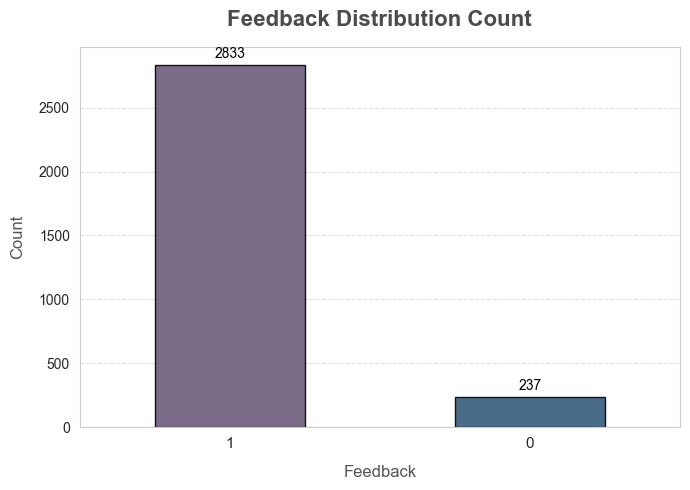

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set modern, minimalistic style
sns.set_style('whitegrid')

# Create a compact figure
plt.figure(figsize=(7, 5))

# Define custom gradient-like colors
colors = ['#6C5B7B', '#355C7D']

# Generate the bar plot
ax = data['feedback'].value_counts().plot.bar(
    color=colors, 
    edgecolor='black', 
    alpha=0.9
)

# Customize the title and labels with futuristic font styles
plt.title('Feedback Distribution Count', fontsize=16, weight='bold', color='#4B4B4B', pad=15)
plt.xlabel('Feedback', fontsize=12, labelpad=10, color='#555555')
plt.ylabel('Count', fontsize=12, labelpad=10, color='#555555')

# Add annotations on bars
for p in ax.patches:
    ax.annotate(
        f'{p.get_height()}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', fontsize=10, color='black', 
        xytext=(0, 8), textcoords='offset points'
    )

# Customize tick parameters
ax.tick_params(axis='x', labelsize=11, rotation=0)
ax.tick_params(axis='y', labelsize=10)

# Add subtle gridlines on y-axis only
ax.yaxis.grid(True, linestyle='--', alpha=0.6)
ax.xaxis.grid(False)

# Tight layout for a polished look
plt.tight_layout()
plt.show()



In [42]:
#Finding the percentage distribution of each feedback - we'll divide the number of records for each feedback by total number of records

print(f"Feedback value count - percentage distribution: \n{round(data['feedback'].value_counts()/data.shape[0]*100,2)}")

Feedback value count - percentage distribution: 
feedback
1    92.28
0     7.72
Name: count, dtype: float64


Feedback distribution

91.87% reviews are positive
8.13% reviews are negative

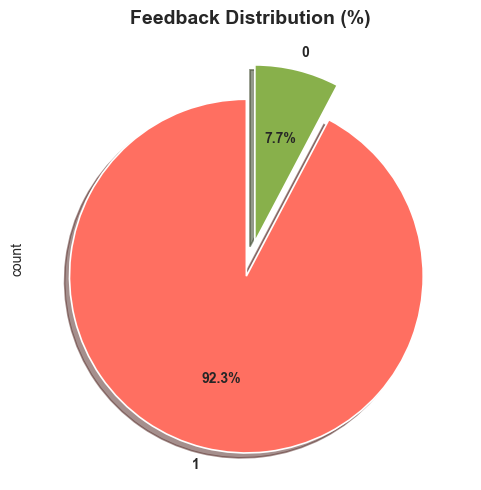

In [44]:
import matplotlib.pyplot as plt

# Compact figure size
plt.figure(figsize=(5, 5))

# Pie chart parameters
colors = ['#FF6F61', '#88B04B']  # Updated vibrant colors
explode = (0.1, 0.1)  # Highlight both segments
wp = {'linewidth': 1.2, 'edgecolor': 'white'}

# Generate the pie chart
data['feedback'].value_counts().plot(
    kind='pie',
    autopct="%1.1f%%",
    shadow=True,
    colors=colors,
    startangle=90,
    wedgeprops=wp,
    explode=explode,
    textprops={'fontsize': 10, 'weight': 'bold'}
)

# Add a clean title
plt.title('Feedback Distribution (%)', fontsize=14, weight='bold', pad=10)

# Display the plot
plt.tight_layout()
plt.show()


In [45]:
#Feedback = 0
data[data['feedback'] == 0]['rating'].value_counts()

rating
1    146
2     91
Name: count, dtype: int64

In [46]:
#Feedback = 1
data[data['feedback'] == 1]['rating'].value_counts()

rating
5    2246
4     447
3     140
Name: count, dtype: int64

If rating of a review is 1 or 2 then the feedback is 0 (negative) and if the rating is 3, 4 or 5 then the feedback is 1 (positive).

In [47]:
#Distinct values of 'variation' and its count 

print(f"Variation value count: \n{data['variation'].value_counts()}")

Variation value count: 
variation
Black  Dot                      494
Charcoal Fabric                 430
Configuration: Fire TV Stick    340
Black  Plus                     261
Black  Show                     259
Black                           258
Black  Spot                     235
White  Dot                      180
Heather Gray Fabric             153
White  Spot                     104
Sandstone Fabric                 88
White                            87
White  Show                      82
White  Plus                      76
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64


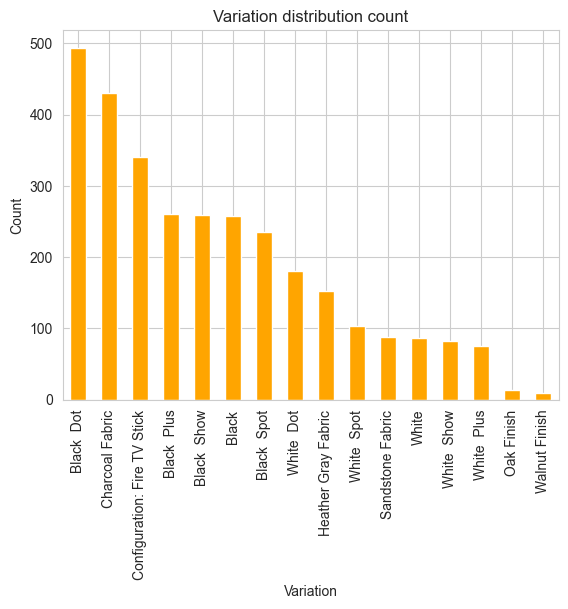

In [50]:
#Bar graph to visualize the total counts of each variation

data['variation'].value_counts().plot.bar(color = 'orange')
plt.title('Variation distribution count')
plt.xlabel('Variation')
plt.ylabel('Count')
plt.show()

In [51]:
#Finding the percentage distribution of each variation - we'll divide the number of records for each variation by total number of records

print(f"Variation value count - percentage distribution: \n{round(data['variation'].value_counts()/data.shape[0]*100,2)}")

Variation value count - percentage distribution: 
variation
Black  Dot                      16.09
Charcoal Fabric                 14.01
Configuration: Fire TV Stick    11.07
Black  Plus                      8.50
Black  Show                      8.44
Black                            8.40
Black  Spot                      7.65
White  Dot                       5.86
Heather Gray Fabric              4.98
White  Spot                      3.39
Sandstone Fabric                 2.87
White                            2.83
White  Show                      2.67
White  Plus                      2.48
Oak Finish                       0.46
Walnut Finish                    0.29
Name: count, dtype: float64


In [52]:
data.groupby('variation')['rating'].mean()


variation
Black                           4.248062
Black  Dot                      4.469636
Black  Plus                     4.379310
Black  Show                     4.494208
Black  Spot                     4.336170
Charcoal Fabric                 4.730233
Configuration: Fire TV Stick    4.614706
Heather Gray Fabric             4.712418
Oak Finish                      4.857143
Sandstone Fabric                4.340909
Walnut Finish                   4.888889
White                           4.218391
White  Dot                      4.477778
White  Plus                     4.394737
White  Show                     4.304878
White  Spot                     4.403846
Name: rating, dtype: float64

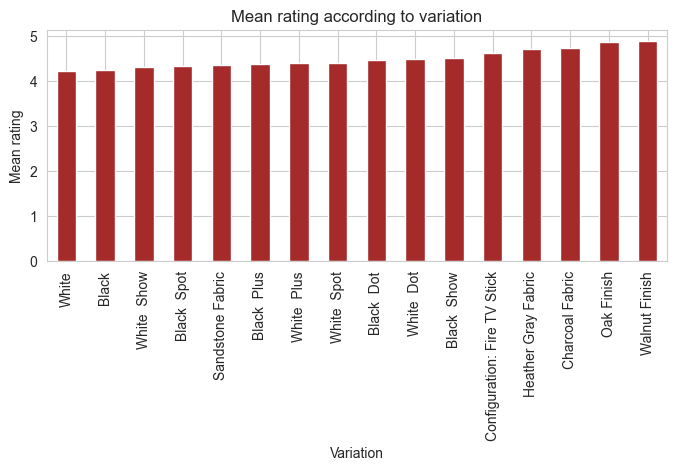

In [54]:
data.groupby('variation')['rating'].mean().sort_values().plot.bar(color = 'brown', figsize=(8, 3))
plt.title("Mean rating according to variation")
plt.xlabel('Variation')
plt.ylabel('Mean rating')
plt.show()

***Analyzing 'verified_reviews' column***

This column contains the textual review given by the user for a variation for the product.

In [55]:
data['length'].describe()

count    3070.000000
mean      135.477199
std       183.208825
min         2.000000
25%        31.250000
50%        77.000000
75%       168.000000
max      2851.000000
Name: length, dtype: float64

In [56]:
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(data.verified_reviews)

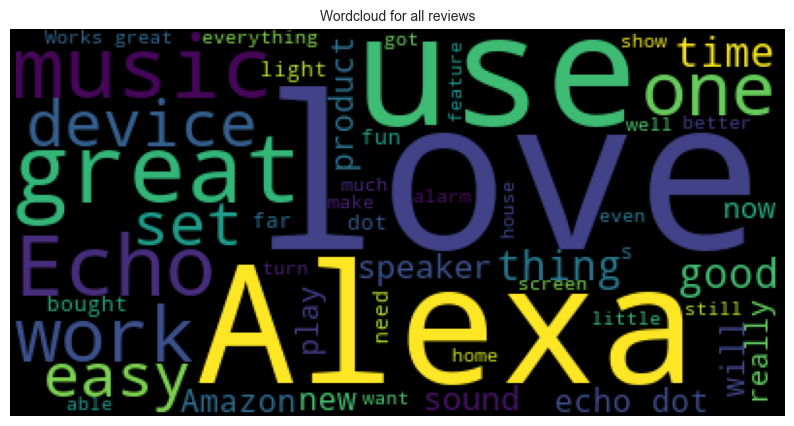

In [62]:
# Combine all reviews
reviews = " ".join([review for review in data['verified_reviews']])
                        
# Initialize wordcloud object
wc = WordCloud(background_color='black', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

In [59]:
# Combine all reviews for each feedback category and splitting them into individual words
neg_reviews = " ".join([review for review in data[data['feedback'] == 0]['verified_reviews']])
neg_reviews = neg_reviews.lower().split()

pos_reviews = " ".join([review for review in data[data['feedback'] == 1]['verified_reviews']])
pos_reviews = pos_reviews.lower().split()

#Finding words from reviews which are present in that feedback category only
unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = " ".join(unique_negative)

unique_positive = [x for x in pos_reviews if x not in neg_reviews]
unique_positive = " ".join(unique_positive)

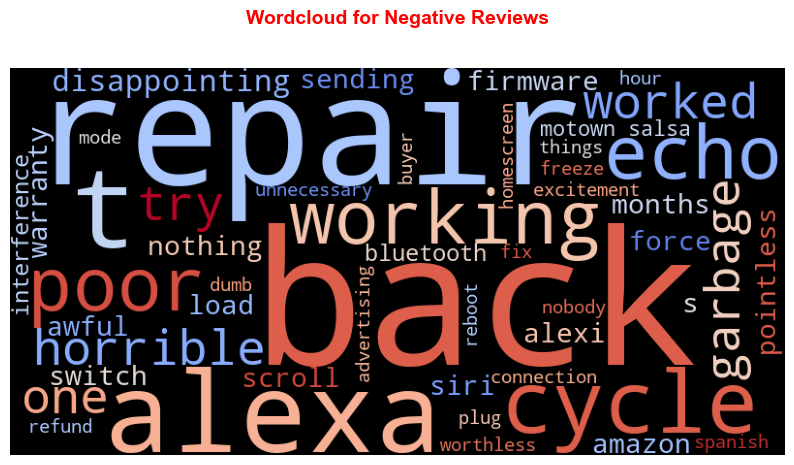

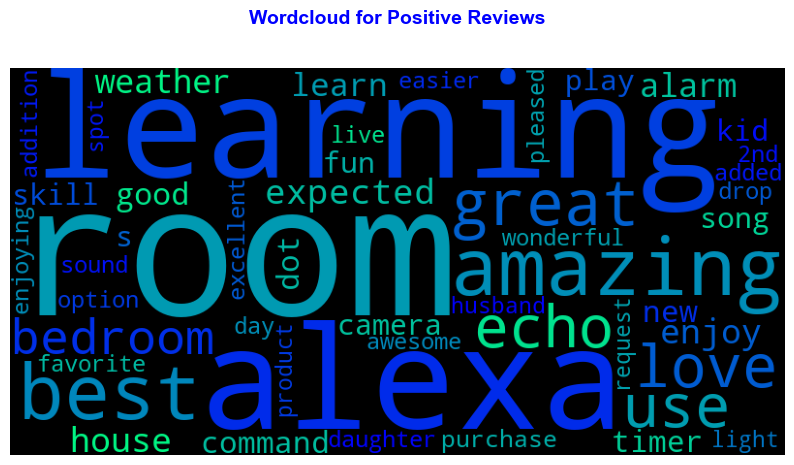

In [81]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Wordcloud for negative reviews
wc_neg = WordCloud(background_color='black', colormap='coolwarm', max_words=50, width=800, height=400)

# Generate and plot wordcloud for negative reviews
plt.figure(figsize=(10, 10))
plt.imshow(wc_neg.generate(unique_negative))
plt.axis('off')
plt.title('Wordcloud for Negative Reviews', fontsize=14, weight='bold', color='Red', pad=18, loc='center', y=1.05)
plt.show()

# Wordcloud for positive reviews
wc_pos = WordCloud(background_color='black', colormap='winter', max_words=50, width=800, height=400)

# Generate and plot wordcloud for positive reviews
plt.figure(figsize=(10, 10))
plt.imshow(wc_pos.generate(unique_positive))
plt.axis('off')
plt.title('Wordcloud for Positive Reviews', fontsize=14, weight='bold', color='Blue', pad=18, loc='center', y=1.05)
plt.show()



***Preprocessing and Modelling***
*To build the corpus from the 'verified_reviews' we perform the following* -

**Replace any non alphabet characters with a space**

**Covert to lower case and split into words**

**Iterate over the individual words and if it is not a stopword then add the stemmed form of the word to the corpus**

In [82]:
corpus = []
stemmer = PorterStemmer()
for i in range(0, data.shape[0]):
  review = re.sub('[^a-zA-Z]', ' ', data.iloc[i]['verified_reviews'])
  review = review.lower().split()
  review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
  review = ' '.join(review)
  corpus.append(review)

In [83]:
cv = CountVectorizer(max_features = 2500)

#Storing independent and dependent variables in X and y
X = cv.fit_transform(corpus).toarray()
y = data['feedback'].values

In [85]:
import os
import pickle
from sklearn.feature_extraction.text import CountVectorizer

# Create the directory if it doesn't exist
os.makedirs('Models', exist_ok=True)

# Example: Create and fit a CountVectorizer (if not already done)
cv = CountVectorizer()
# Assuming you've fitted the CountVectorizer to some data, e.g., cv.fit_transform(data)

# Saving the CountVectorizer
pickle.dump(cv, open('Models/countVectorizer.pkl', 'wb'))


In [86]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (3070, 2500)
y shape: (3070,)


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

X train: (2149, 2500)
y train: (2149,)
X test: (921, 2500)
y test: (921,)


In [88]:
print(f"X train max value: {X_train.max()}")
print(f"X test max value: {X_test.max()}")

X train max value: 12
X test max value: 10


We'll scale X_train and X_test so that all values are between 0 and 1.

In [89]:
scaler = MinMaxScaler()

X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [90]:
#Saving the scaler model
pickle.dump(scaler, open('Models/scaler.pkl', 'wb'))

***Random Forest***

In [124]:
#Fitting scaled X_train and y_train on Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train_scl, y_train)

RandomForestClassifier()

In [125]:
#Accuracy of the model on training and testing data
 
print("Training Accuracy :", model_rf.score(X_train_scl, y_train))
print("Testing Accuracy :", model_rf.score(X_test_scl, y_test))

Training Accuracy : 0.9995346672871103
Testing Accuracy : 0.9402823018458197


In [126]:
#Predicting on the test set
y_preds = model_rf.predict(X_test_scl)

In [127]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)

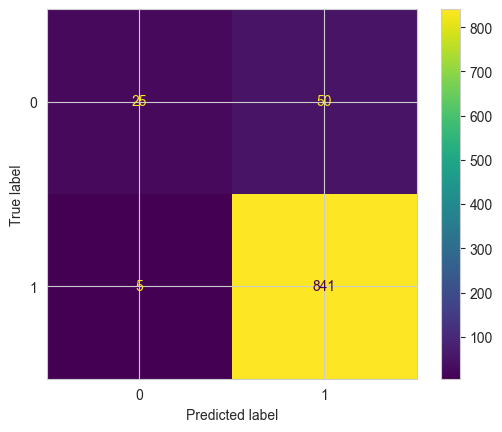

In [128]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_rf.classes_)
cm_display.plot()
plt.show()

***XgBoost***

In [129]:
xgb = XGBClassifier()
xgb.fit(X_train_scl, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [130]:
    #Accuracy of the model on training and testing data
 
print("Training Accuracy :", model_xgb.score(X_train_scl, y_train))
print("Testing Accuracy :", model_xgb.score(X_test_scl, y_test))

Training Accuracy : 0.9827826896230805
Testing Accuracy : 0.9370249728555917


In [131]:
y_preds = model_xgb.predict(X_test)

In [132]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[ 26  49]
 [ 13 833]]


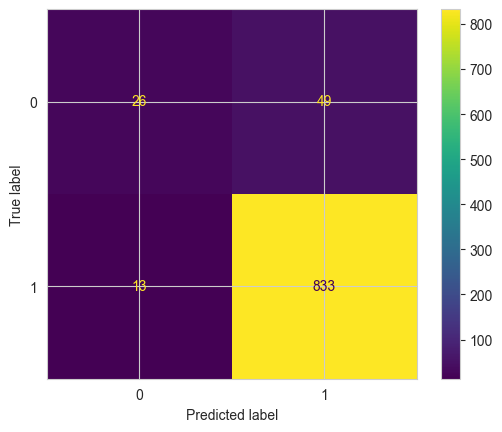

In [133]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_xgb.classes_)
cm_display.plot()
plt.show()

In [134]:
#Saving the XGBoost classifier
pickle.dump(model_xgb, open('Models/model_xgb.pkl', 'wb'))

***Decision Tree Classifier***

In [136]:
dt = DecisionTreeClassifier()
dt.fit(X_train_scl, y_train)

DecisionTreeClassifier()

In [137]:
#Accuracy of the model on training and testing data
 
print("Training Accuracy :", model_dt.score(X_train_scl, y_train))
print("Testing Accuracy :", model_dt.score(X_test_scl, y_test))

Training Accuracy : 0.9995346672871103
Testing Accuracy : 0.9153094462540716


In [138]:
y_preds = model_dt.predict(X_test)

In [139]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[ 34  41]
 [ 41 805]]


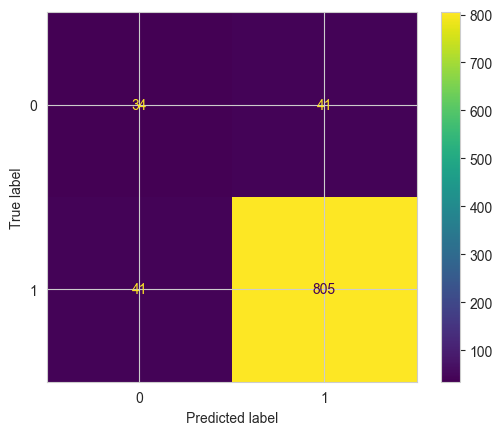

In [140]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_dt.classes_)
cm_display.plot()
plt.show()

In [143]:
from sklearn.metrics import classification_report, accuracy_score


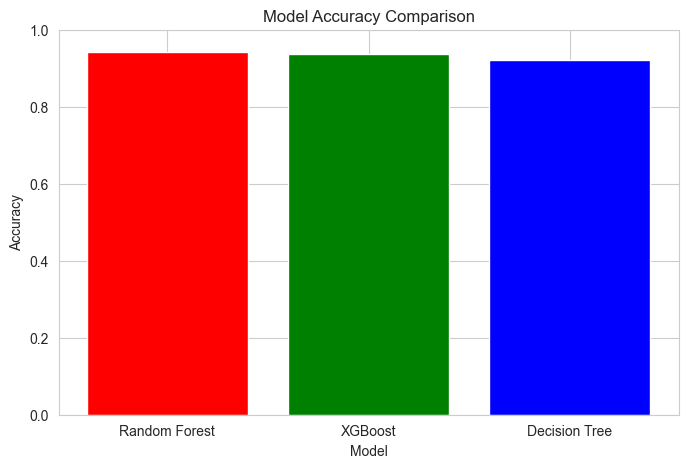

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.33      0.48        75
           1       0.94      1.00      0.97       846

    accuracy                           0.94       921
   macro avg       0.90      0.66      0.72       921
weighted avg       0.94      0.94      0.93       921

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.31      0.44        75
           1       0.94      0.99      0.97       846

    accuracy                           0.94       921
   macro avg       0.87      0.65      0.70       921
weighted avg       0.93      0.94      0.92       921

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.57      0.54        75
           1       0.96      0.95      0.96       846

    accuracy                           0.92       921
   macro avg       0.74

In [146]:
import matplotlib.pyplot as plt
import numpy as np

# Get the accuracy of all models
rf_accuracy = accuracy_score(y_test, rf.predict(X_test_scl))
xgb_accuracy = accuracy_score(y_test, xgb.predict(X_test_scl))
dt_accuracy = accuracy_score(y_test, dt.predict(X_test_scl))

# Plotting the accuracies of the models
models = ['Random Forest', 'XGBoost', 'Decision Tree']
accuracies = [rf_accuracy, xgb_accuracy, dt_accuracy]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['red', 'green', 'blue'])
plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

# Print the classification reports for comparison
print("Random Forest Classification Report:")
print(classification_report(y_test, rf.predict(X_test_scl)))

print("XGBoost Classification Report:")
print(classification_report(y_test, xgb.predict(X_test_scl)))

print("Decision Tree Classification Report:")
print(classification_report(y_test, dt.predict(X_test_scl)))



1. Save Model Performance Results:

In [147]:
# Save classification reports to a text file
with open("model_performance.txt", "w") as f:
    f.write("Random Forest Classification Report:\n")
    f.write(classification_report(y_test, rf.predict(X_test_scl)))
    f.write("\n\nXGBoost Classification Report:\n")
    f.write(classification_report(y_test, xgb.predict(X_test_scl)))
    f.write("\n\nDecision Tree Classification Report:\n")
    f.write(classification_report(y_test, dt.predict(X_test_scl)))


In [148]:
import pandas as pd

# Save accuracies and other metrics to a CSV
metrics = {
    'Model': ['Random Forest', 'XGBoost', 'Decision Tree'],
    'Accuracy': [rf_accuracy, xgb_accuracy, dt_accuracy]
}

df_metrics = pd.DataFrame(metrics)
df_metrics.to_csv('model_accuracies.csv', index=False)


In [ ]:
import pickle

# Saving the Random Forest model
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf, f)

# Loading the model
with open('random_forest_model.pkl', 'rb') as f:
    loaded_rf_model = pickle.load(f)


In [151]:
pip install streamlit


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Correlation between Sentiments and Ratings:
          feedback    rating
feedback  1.000000  0.859038
rating    0.859038  1.000000


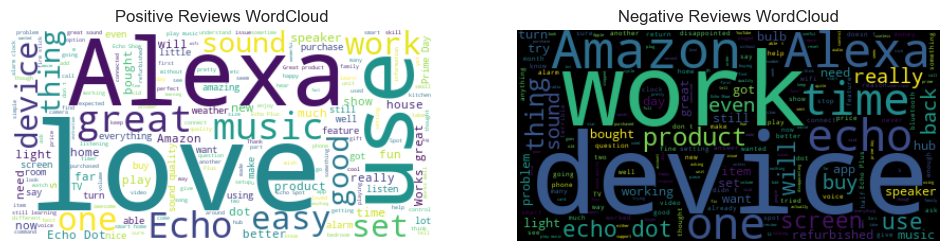

In [156]:

# Preprocessing
data.dropna(inplace=True)  # Drop null values
data['length'] = data['verified_reviews'].apply(len)  # Add review length column

# Corpus creation
corpus = []
stemmer = PorterStemmer()
STOPWORDS = set(stopwords.words('english'))

for i in range(len(data)):
    review = re.sub('[^a-zA-Z]', ' ', data.iloc[i]['verified_reviews'])
    review = review.lower().split()
    review = [stemmer.stem(word) for word in review if word not in STOPWORDS]
    corpus.append(' '.join(review))

# Vectorization
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()
y = data['feedback']

# Save CountVectorizer for later use
pickle.dump(cv, open('Models/countVectorizer.pkl', 'wb'))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

# Model training
rf = RandomForestClassifier(random_state=15)
rf.fit(X_train, y_train)

# Predictions and evaluation
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

# Save classification reports
with open("model_performance.txt", "w") as f:
    f.write("Random Forest Classification Report:\n")
    f.write(classification_report(y_test, rf_pred))

# Save accuracy metrics
metrics = {'Model': ['Random Forest'], 'Accuracy': [rf_accuracy]}
df_metrics = pd.DataFrame(metrics)
df_metrics.to_csv('model_accuracies.csv', index=False)

# Save Random Forest model
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf, f)

# Correlation Analysis between Sentiments and Ratings
if 'rating' in data.columns:
    sentiment_rating_corr = data[['feedback', 'rating']].corr()
    print("Correlation between Sentiments and Ratings:")
    print(sentiment_rating_corr)

# Trend Analysis over Time
if 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'], errors='coerce')
    sentiment_trend = data.groupby(data['date'].dt.to_period('M'))['feedback'].mean()
    plt.figure(figsize=(10, 6))
    sentiment_trend.plot()
    plt.title("Sentiment Trend Over Time")
    plt.xlabel("Time")
    plt.ylabel("Average Sentiment")
    plt.show()

# WordCloud for Positive and Negative Reviews
positive_reviews = ' '.join(data[data['feedback'] == 1]['verified_reviews'])
negative_reviews = ' '.join(data[data['feedback'] == 0]['verified_reviews'])

wc_positive = WordCloud(background_color='white').generate(positive_reviews)
wc_negative = WordCloud(background_color='black').generate(negative_reviews)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wc_positive, interpolation='bilinear')
plt.title('Positive Reviews WordCloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wc_negative, interpolation='bilinear')
plt.title('Negative Reviews WordCloud')
plt.axis('off')

plt.show()



2024-12-02 18:43:29.450 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-02 18:43:29.459 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-02 18:43:29.459 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-02 18:43:29.461 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-02 18:43:29.461 The `use_column_width` parameter has been deprecated and will be removed in a future release. Please utilize the `use_container_width` parameter instead.
2024-12-02 18:43:29.466 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-02 18:43:29.604 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-02 18:43:29.605 Thread 'MainThread': missing ScriptRunCont

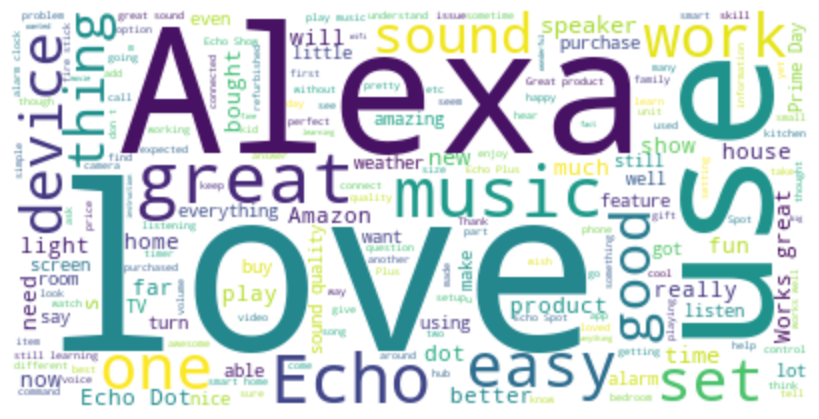

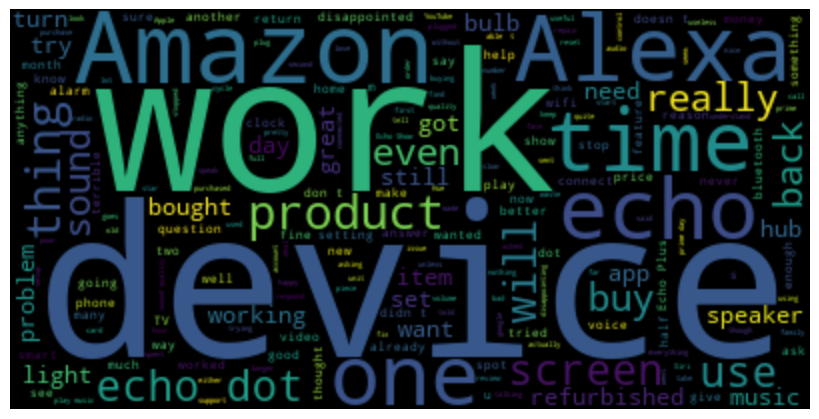

In [161]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import streamlit as st
import numpy as np
from PIL import Image

def generate_wordcloud(wordcloud_obj):
    """
    Convert a WordCloud object into a displayable image.
    """
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud_obj, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)

    # Save the plot as an image in memory
    from io import BytesIO
    buffer = BytesIO()
    plt.savefig(buffer, format="png")
    buffer.seek(0)
    image = Image.open(buffer)
    return image

# Assuming wc_positive and wc_negative are WordCloud objects
try:
    wc_positive_img = generate_wordcloud(wc_positive)
    wc_negative_img = generate_wordcloud(wc_negative)

    # Display WordClouds in Streamlit
    st.subheader("WordClouds for Reviews")
    st.image(wc_positive_img, caption="Positive Reviews", use_column_width=True)
    st.image(wc_negative_img, caption="Negative Reviews", use_column_width=True)
except Exception as e:
    st.error(f"Error generating WordCloud images: {e}")
import pickle

with open('wc_positive.pkl', 'wb') as f:
    pickle.dump(wc_positive, f)

with open('wc_negative.pkl', 'wb') as f:
    pickle.dump(wc_negative, f)



2024-12-02 18:45:21.626 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-02 18:45:21.629 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-02 18:45:21.630 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-02 18:45:21.631 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-02 18:45:21.636 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-02 18:45:21.636 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-02 18:45:21.637 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-02 18:45:21.637 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

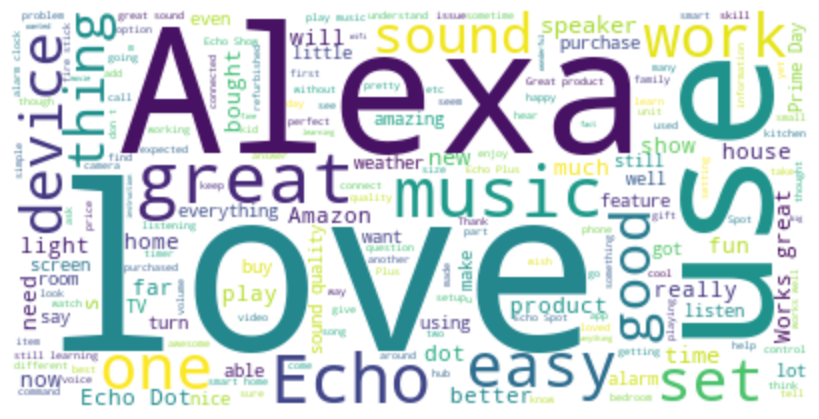

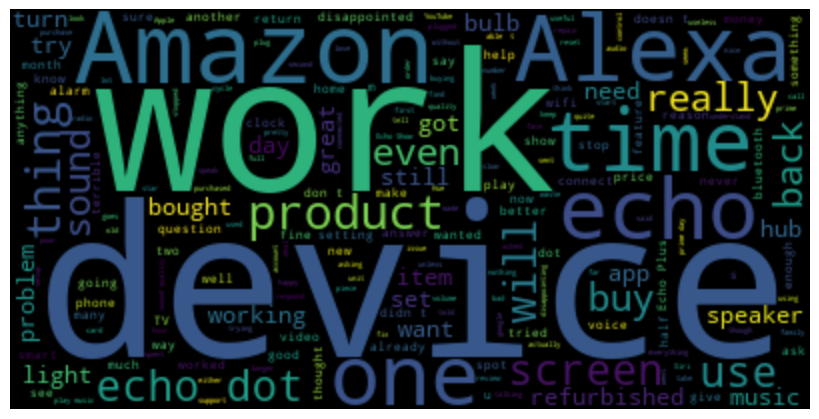

In [164]:
import streamlit as st
import pandas as pd
import pickle
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Streamlit Dashboard
st.title("Sentiment Analysis Dashboard")
st.sidebar.header("Options")

# Load necessary models and data
try:
    # Load metrics
    df_metrics = pd.read_csv('model_accuracies.csv')
    st.subheader("Model Performance Metrics")
    st.dataframe(df_metrics)
except FileNotFoundError:
    st.warning("Model performance metrics not found. Ensure 'model_accuracies.csv' is available.")

# Load WordClouds
def load_wordcloud(filepath):
    with open(filepath, 'rb') as f:
        return pickle.load(f)

try:
    wc_positive = load_wordcloud('wc_positive.pkl')
    wc_negative = load_wordcloud('wc_negative.pkl')
    
    def generate_image(wordcloud):
        plt.figure(figsize=(8, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.tight_layout(pad=0)
        from io import BytesIO
        buffer = BytesIO()
        plt.savefig(buffer, format="png")
        buffer.seek(0)
        image = Image.open(buffer)
        return image

    wc_positive_img = generate_image(wc_positive)
    wc_negative_img = generate_image(wc_negative)

    st.subheader("WordClouds for Reviews")
    st.image(wc_positive_img, caption="Positive Reviews", use_column_width=True)
    st.image(wc_negative_img, caption="Negative Reviews", use_column_width=True)
except FileNotFoundError:
    st.warning("WordClouds are not available. Ensure they're precomputed and saved.")

# Sentiment Trend Analysis
try:
    sentiment_trend = pd.read_csv('sentiment_trend.csv')  # Assuming sentiment trend data is saved as CSV
    st.subheader("Sentiment Trend Over Time")
    st.line_chart(sentiment_trend)
except FileNotFoundError:
    st.warning("Sentiment trend data is missing.")

# Correlation Analysis
try:
    with open('sentiment_rating_corr.pkl', 'rb') as f:
        sentiment_rating_corr = pickle.load(f)
    st.subheader("Correlation Between Sentiments and Ratings")
    st.write(f"Correlation Coefficient: {sentiment_rating_corr:.2f}")
except FileNotFoundError:
    st.warning("Sentiment and rating correlation analysis is missing.")

# Additional Sidebar Options
st.sidebar.subheader("Upload New Data")
uploaded_file = st.sidebar.file_uploader("Upload a CSV for Prediction", type=['csv'])

if uploaded_file:
    try:
        new_data = pd.read_csv(uploaded_file)
        st.write("Uploaded Data Preview:")
        st.dataframe(new_data.head())
        
        # Load CountVectorizer and Random Forest model
        with open('Models/countVectorizer.pkl', 'rb') as f:
            cv = pickle.load(f)
        with open('random_forest_model.pkl', 'rb') as f:
            rf = pickle.load(f)

        # Preprocess and predict sentiment
        new_corpus = [cv.transform([review]).toarray() for review in new_data['verified_reviews']]
        predictions = [rf.predict(review)[0] for review in new_corpus]
        new_data['Predicted Sentiment'] = predictions
        
        st.subheader("Predictions on Uploaded Data")
        st.dataframe(new_data)
    except Exception as e:
        st.error(f"Error processing uploaded file: {e}")

